In [2]:
import cv2.cv2 as cv2
import numpy as np
import PIL.Image as Image
from IPython.display import display

In [118]:
flower = cv2.imread('./Sample Images/flowerSalt.jpg')

In [119]:
flower.shape

(600, 800, 3)

In [130]:
flower_gray = cv2.cvtColor(flower, cv2.COLOR_BGR2GRAY)

In [131]:
flower_gray.shape

(600, 800)

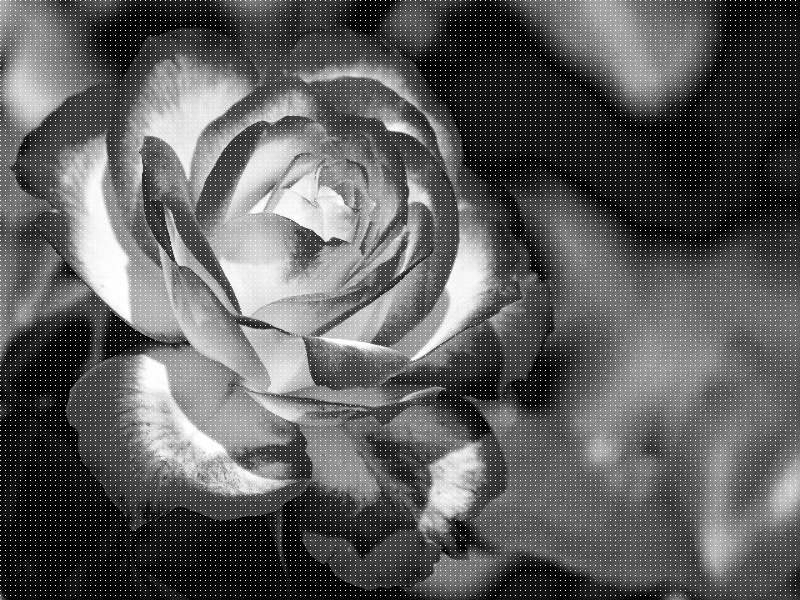

In [132]:
display(Image.fromarray(flower_gray))

In [133]:
filter = np.array([(1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1)]) * (1/25)

In [134]:
image_shape = flower_gray.shape
filter_shape = filter.shape

In [135]:
row = image_shape[0] + filter_shape[0] - 1
col = image_shape[1] + filter_shape[1] - 1
new_img_arr = np.zeros((row, col))

In [136]:
new_img_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [137]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        new_img_arr[i + int((filter_shape[0] - 1) // 2), j + int((filter_shape[1] - 1) // 2)] = flower_gray[i, j]

In [138]:
new_img_arr

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0., 253., ...,   3.,   0.,   0.],
       ...,
       [  0.,   0., 147., ...,  45.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

# Arithmetic mean filter

In [30]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.sum(temp * filter)
        flower_gray[i, j] = res

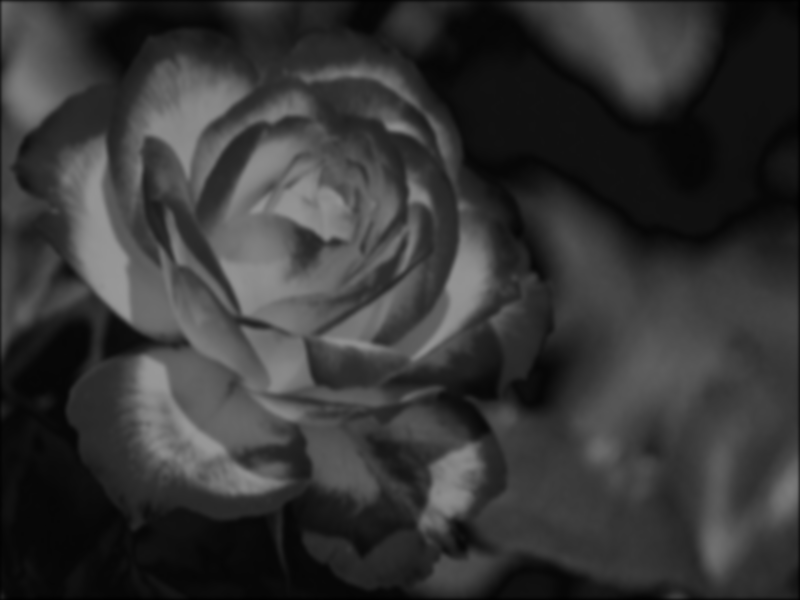

In [31]:
display(Image.fromarray(flower_gray))

# Geometric mean filter

In [44]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.prod(temp ** filter)
        flower_gray[i, j] = res

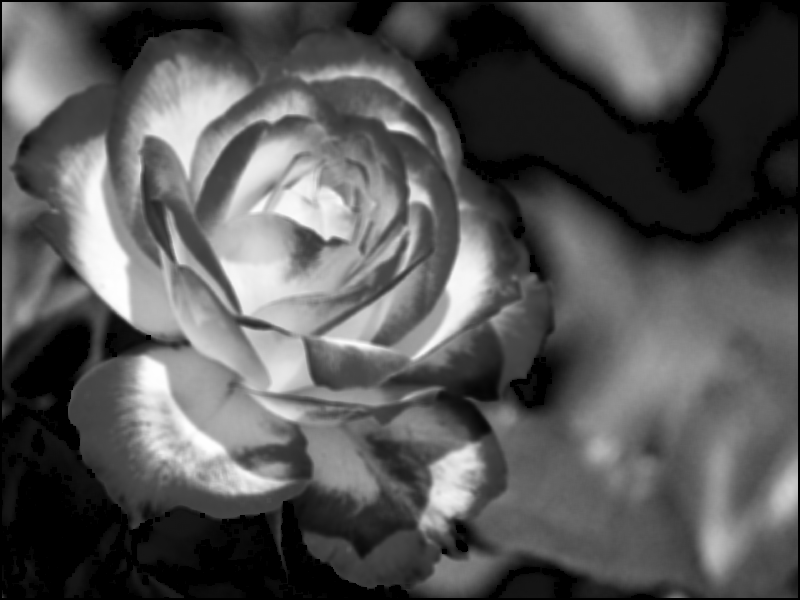

In [45]:
display(Image.fromarray(flower_gray))

# Harmonic mean filter

In [68]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = (filter_shape[0] * filter_shape[1]) // np.sum(np.reciprocal(temp))
        flower_gray[i, j] = res

C:\Users\Rum3006\AppData\Local\Temp\ipykernel_3036\2101451639.py:4: RuntimeWarning: divide by zero encountered in reciprocal
  res = (filter_shape[0] * filter_shape[1]) // np.sum(np.reciprocal(temp))


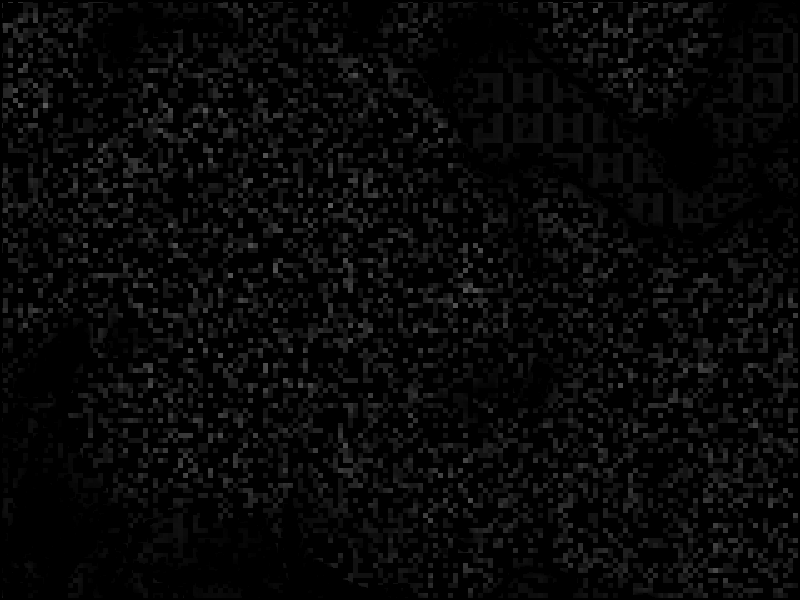

In [69]:
display(Image.fromarray(flower_gray))

# Contraharmonic mean filter

In [81]:
Q = -0.5
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = (np.sum(temp ** (Q + 1))) // (np.sum(temp ** Q))
        flower_gray[i, j] = res

C:\Users\Rum3006\AppData\Local\Temp\ipykernel_3036\1204882147.py:5: RuntimeWarning: divide by zero encountered in power
  res = (np.sum(temp ** (Q + 1))) // (np.sum(temp ** Q))


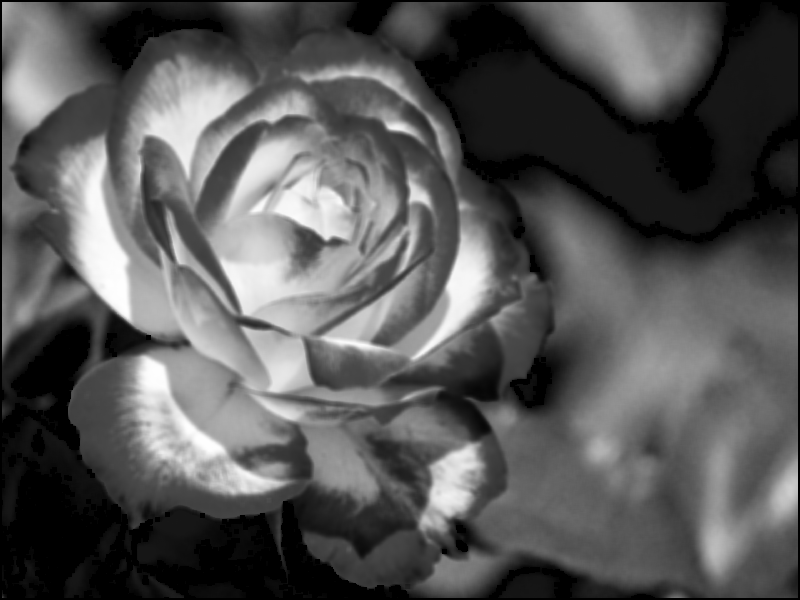

In [82]:
display(Image.fromarray(flower_gray))

# Order-statistic filters

## Median filter

In [89]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.median(temp)
        flower_gray[i, j] = res

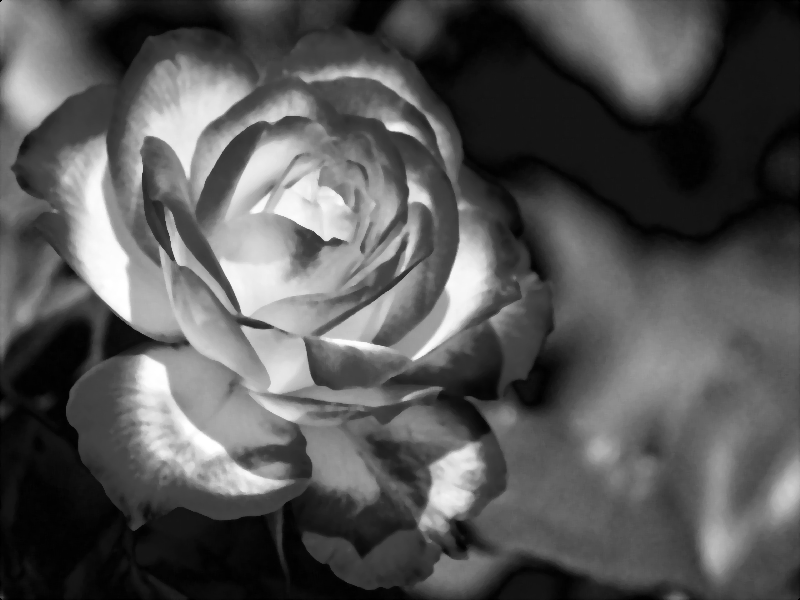

In [90]:
display(Image.fromarray(flower_gray))

# Max - min filter

In [97]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.amax(temp)
        flower_gray[i, j] = res

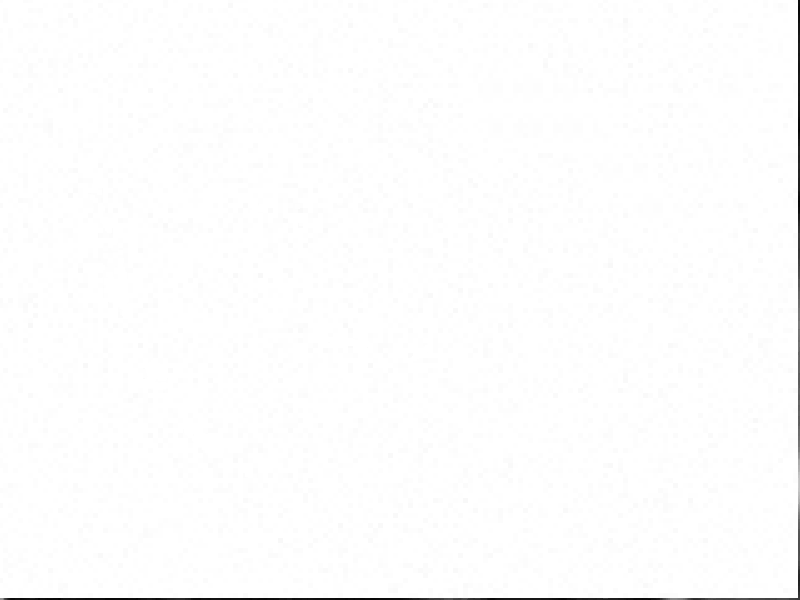

In [98]:
display(Image.fromarray(flower_gray))

In [107]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.amin(temp)
        flower_gray[i, j] = res

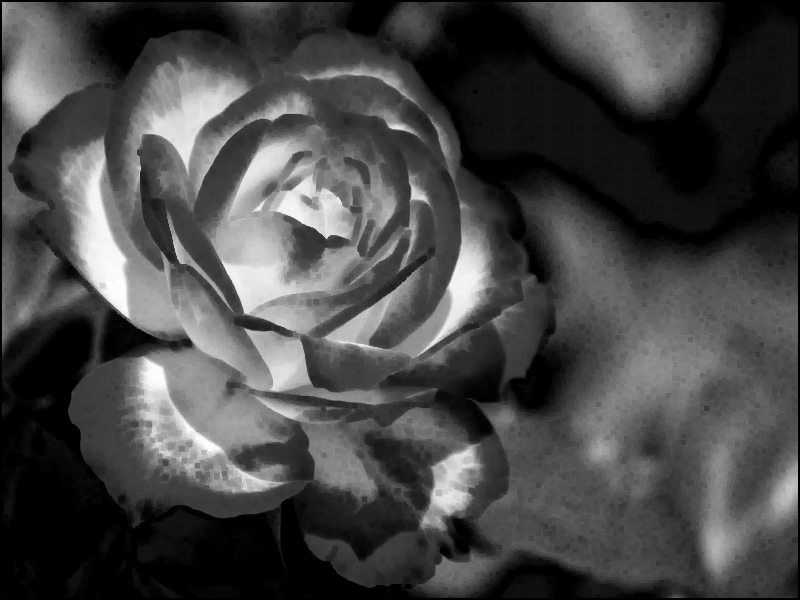

In [108]:
display(Image.fromarray(flower_gray))

# Midpoint filter

In [116]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.amax(temp * (1/2)) + np.amin(temp * (1/2))
        flower_gray[i, j] = res

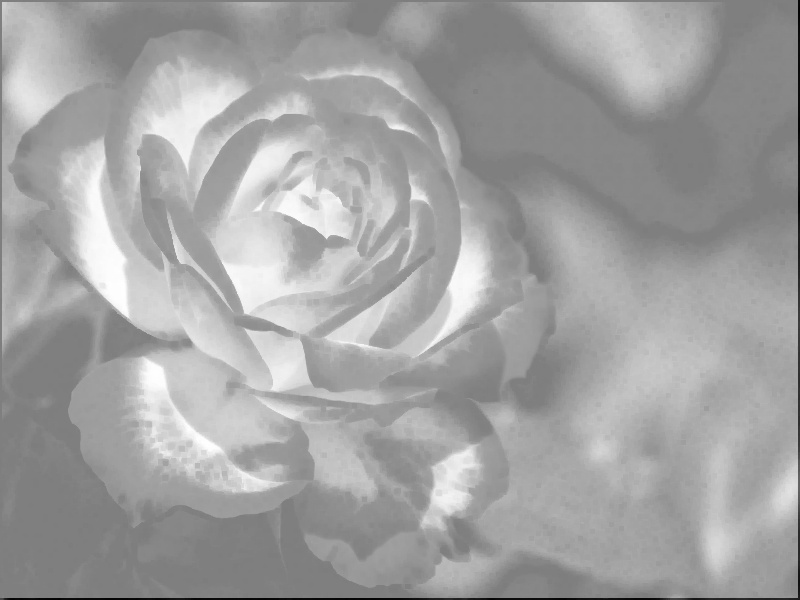

In [117]:
display(Image.fromarray(flower_gray))

# Alpha-trimmed mean filter

In [122]:
d = 2
filter = np.array([(1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1)]) * (1/25)

In [128]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]].copy()
        # max
        indices = temp.argpartition(temp.size - (d//2), axis = None)[-(d//2):]
        x, y = np.unravel_index(indices, temp.shape)
        temp[x, y] = 0
        
        # min
        indices = temp.argpartition(temp.size - (d//2), axis = None)[:(d//2)]
        x, y = np.unravel_index(indices, temp.shape)
        temp[x, y] = 0
        
        res = np.sum(temp * filter)
        flower_gray[i, j] = res

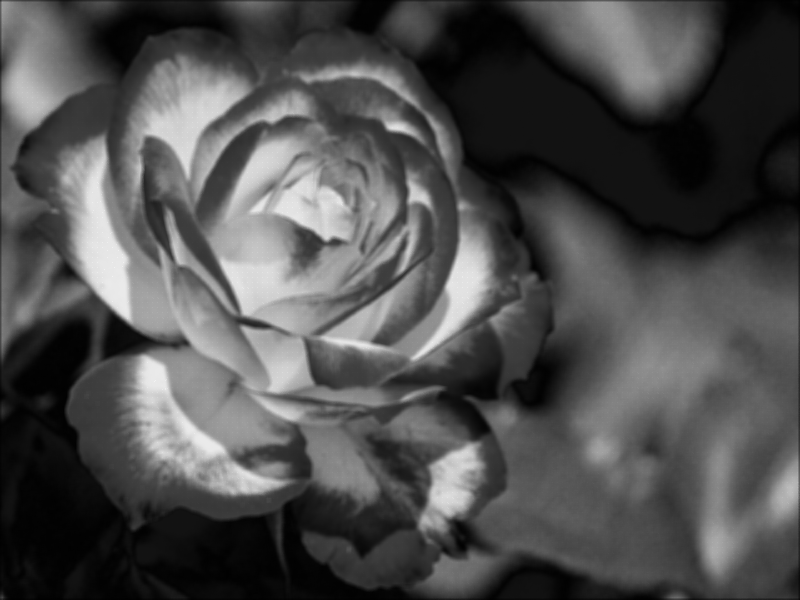

In [129]:
display(Image.fromarray(flower_gray))

# Adaptive filters

In [139]:
local_var = np.zeros((image_shape[0], image_shape[1]))
local_mean = np.zeros((image_shape[0], image_shape[1]))

for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        local_mean[i, j] = np.mean(temp)
        local_var[i, j] = np.mean(temp ** 2) - (local_mean[i, j] ** 2)     

In [140]:
local_var

array([[7819.8976, 8248.5184, 7730.2944, ..., 2387.28  ,   20.2816,
          15.7024],
       [8171.2096, 7443.44  , 5143.6096, ..., 2345.0944,   22.2624,
          17.2416],
       [7758.9184, 5184.    ,  290.5056, ..., 2317.84  ,   18.7136,
          15.76  ],
       ...,
       [3994.8   , 3318.72  , 2619.7984, ..., 1676.9056,  367.2864,
         498.4224],
       [2720.2784, 2346.5344, 1902.3776, ...,  397.1744,  531.3184,
         525.9904],
       [2731.1296, 2559.5904, 2316.6944, ...,  610.2944,  604.5504,
         517.6736]])

In [141]:
local_mean

array([[ 65.32,  85.96, 105.84, ...,  14.8 ,   3.72,   2.76],
       [ 85.48, 113.  , 139.52, ...,  16.84,   5.24,   3.72],
       [106.04, 140.2 , 173.12, ...,  17.8 ,   5.92,   4.4 ],
       ...,
       [ 61.4 ,  69.4 ,  76.04, ...,  54.88,  36.56,  26.76],
       [ 46.96,  54.16,  60.32, ...,  38.16,  29.96,  21.64],
       [ 37.52,  43.64,  48.84, ...,  29.84,  23.36,  16.92]])

In [142]:
noise_var = np.sum(local_var) // len(local_var)
noise_var

1080468.0

In [143]:
local_var = np.maximum(noise_var, local_var)

In [144]:
flower_gray = flower_gray - np.multiply((noise_var / local_var), (flower_gray - local_mean))


In [146]:
flower_gray = flower_gray.astype(np.uint8)

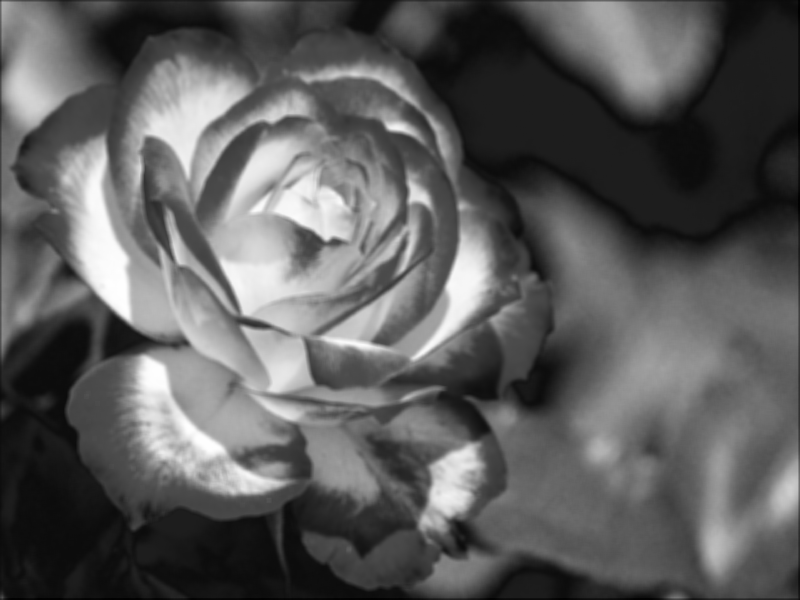

In [147]:
display(Image.fromarray(flower_gray))